# Plotting kde objects

In [82]:
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

# 1d kde

In [124]:
kde = stats.gaussian_kde(np.random.normal(loc=50, scale=5, size=100000))

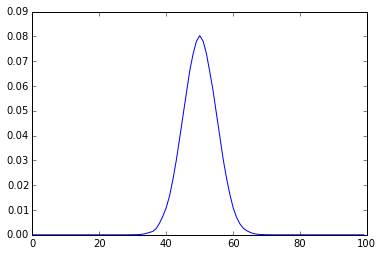

In [125]:
x = np.arange(0, 100, 1)
plt.plot(x, kde(x))
plt.show()

## 2d kde

In [138]:
from scipy import stats
def measure(n):
    "Measurement model, return two coupled measurements."
    m1 = np.random.normal(size=n)
    m2 = np.random.normal(scale=0.5, size=n)
    return m1+m2, m1-m2

In [139]:
m1, m2 = measure(2000)
xmin = m1.min()
xmax = m1.max()
ymin = m2.min()
ymax = m2.max()

In [140]:
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([X.ravel(), Y.ravel()])
values = np.vstack([m1, m2])
kernel = stats.gaussian_kde(values)
Z = np.reshape(kernel(positions).T, X.shape)

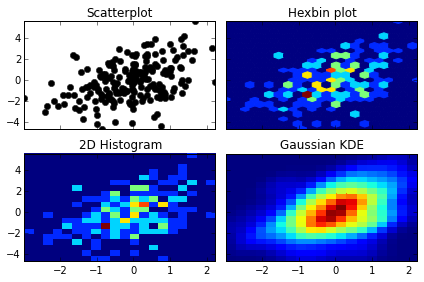

In [149]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import kde

np.random.seed(1977)

# Generate 200 correlated x,y points
data = np.random.multivariate_normal([0, 0], [[1, 0.5], [0.5, 3]], 200)
x, y = data.T

nbins = 20

fig, axes = plt.subplots(ncols=2, nrows=2, sharex=True, sharey=True)

axes[0, 0].set_title('Scatterplot')
axes[0, 0].plot(x, y, 'ko')

axes[0, 1].set_title('Hexbin plot')
axes[0, 1].hexbin(x, y, gridsize=nbins)

axes[1, 0].set_title('2D Histogram')
axes[1, 0].hist2d(x, y, bins=nbins)

# Evaluate a gaussian kde on a regular grid of nbins x nbins over data extents
k = kde.gaussian_kde(data.T)
xi, yi = np.mgrid[x.min():x.max():nbins*1j, y.min():y.max():nbins*1j]
zi = k(np.vstack([xi.flatten(), yi.flatten()]))

axes[1, 1].set_title('Gaussian KDE')
axes[1, 1].pcolormesh(xi, yi, zi.reshape(xi.shape))

fig.tight_layout()
plt.show()

In [189]:
size = 1000
kde = stats.gaussian_kde(
        [np.random.normal(loc=40, scale=10, size=size),
         np.random.normal(loc=55, scale=3, size=size)]
        )

In [208]:
font = {'family' : 'normal',
        'size'   : 14}

plt.rc('font', **font)

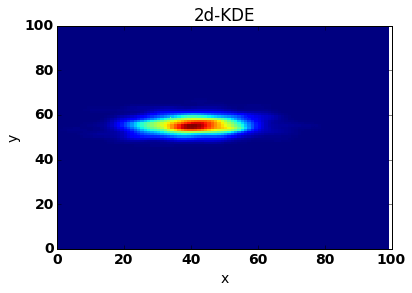

In [209]:
start = 0
end = 100
step = 1

i = np.arange(start, end, step)
nbins = len(i)

xi,yi = np.mgrid[i.min():i.max():nbins*1j, i.min():i.max():nbins*1j]
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))

fig = plt.figure(1)
plt.pcolormesh(xi, yi, zi.reshape(xi.shape))
plt.title('2d-KDE')
plt.xlabel('x')
plt.ylabel('y')
plt.show()
#fig.savefig('/home/nick/test.png', bbox_inches='tight')

In [193]:
size = 1000
kde = stats.gaussian_kde(
        [np.random.normal(loc=40, scale=10, size=size),
         np.random.normal(loc=55, scale=3, size=size)]
        )

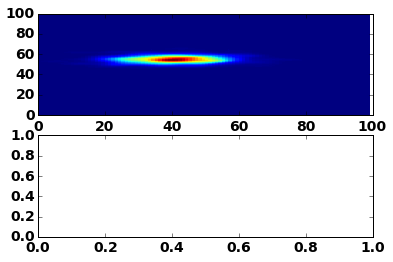

In [218]:
f, axarr = plt.subplots(2)

start = 0
end = 100
step = 1

i = np.arange(start, end, step)
nbins = len(i)

xi,yi = np.mgrid[i.min():i.max():nbins*1j, i.min():i.max():nbins*1j]
zi = kde(np.vstack([xi.flatten(), yi.flatten()]))

#fig = plt.figure(1)
axarr[0].pcolormesh(xi, yi, zi.reshape(xi.shape))

#plt.title('2d-KDE')
#plt.xlabel('x')
#plt.ylabel('y')
#plt.show()
#fig.savefig('/home/nick/test.png', bbox_inches='tight')

# Plotting sandbox

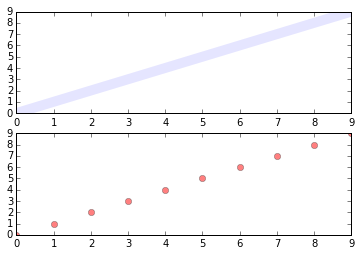

In [115]:
plt.figure(1)
plt.subplot(211)
plt.plot(range(10), lw=10, alpha=0.1)
plt.subplot(212)
plt.plot(range(10), 'ro', alpha=0.5)
plt.show()

In [113]:
plt.subplot?

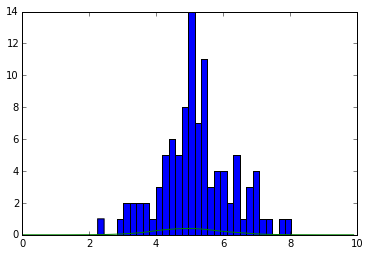

In [105]:
x = np.arange(0, 10, 0.1)
vals = kde.resample(size=100)
plt.figure(1)
plt.hist(vals[0,], 30)
plt.plot(x, kde(x))
plt.show()

# KDE intersection

In [225]:
size = 1000
kde1 = stats.gaussian_kde(
        [np.random.normal(loc=40, scale=10, size=size),
         np.random.normal(loc=55, scale=3, size=size)]
        )

kde2 = stats.gaussian_kde(
        [np.random.normal(loc=55, scale=10, size=size),
         np.random.normal(loc=70, scale=3, size=size)]
        )

kde3 = stats.gaussian_kde(
        [np.random.normal(loc=40, scale=10, size=size),
         np.random.normal(loc=55, scale=3, size=size)]
        )


In [226]:
print kde1.integrate_kde(kde2)
print kde1.integrate_kde(kde3)

6.39154205405e-06
0.00240118058531


In [244]:
kde1 = stats.gaussian_kde(np.random.normal(loc=30, scale=10, size=size))
kde2 = stats.gaussian_kde(np.random.normal(loc=70, scale=10, size=size))

In [245]:
print kde1.integrate_kde(kde1)
print kde1.integrate_kde(kde2)

0.0257390380528
0.000806341714814


In [331]:
# calculating intersection

def kde_intersect(kde1, kde2, start=0, end=100, step=0.1):
    # evalution grid
    x = np.arange(start,end,step)
    # calculate intersection densities
    pmin = np.min(np.c_[kde1(x),kde2(x)], axis=1)
    # integrate areas under curves
    total = kde1.integrate_box_1d(start,end) + kde2.integrate_box_1d(start,end)
    intersection = np.trapz(y=pmin,x=x)
    # overlap coefficient
    return 2 * intersection / float(total)
    
print kde_intersect(kde1, kde1)
print kde_intersect(kde1, kde2)

0.0622207798694
0.0622207798694


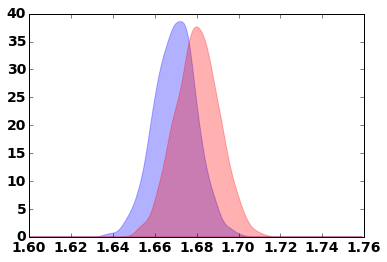

BD shift (1 - kde_intersection): 0.397


In [334]:
# calculating BD shift as 1 - kde_intersection

kde1 = stats.gaussian_kde(np.random.normal(loc=1.67, scale=0.01, size=size))
kde2 = stats.gaussian_kde(np.random.normal(loc=1.68, scale=0.01, size=size))

x = np.arange(1.6,1.76,0.001)
plt.figure(1)
plt.fill_between(x, kde1(x), color='b', alpha=0.3)
plt.fill_between(x, kde2(x), color='r', alpha=0.3)
plt.show()

BD_shift = 1 - kde_intersect(kde1, kde2, start=0, end=2, step=0.01)
print 'BD shift (1 - kde_intersection): {0:.3f}'.format(BD_shift)

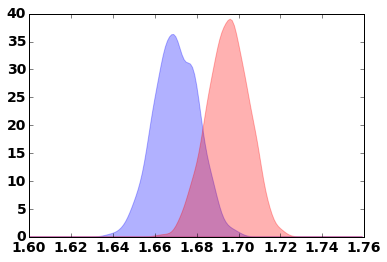

BD shift (1 - kde_intersection): 0.770


In [336]:
# calculating BD shift as 1 - kde_intersection

kde1 = stats.gaussian_kde(np.random.normal(loc=1.67, scale=0.01, size=size))
kde2 = stats.gaussian_kde(np.random.normal(loc=1.695, scale=0.01, size=size))

x = np.arange(1.6,1.76,0.001)
plt.figure(1)
plt.fill_between(x, kde1(x), color='b', alpha=0.3)
plt.fill_between(x, kde2(x), color='r', alpha=0.3)
plt.show()

BD_shift = 1 - kde_intersect(kde1, kde2, start=0, end=2, step=0.01)
print 'BD shift (1 - kde_intersection): {0:.3f}'.format(BD_shift)

# sklearn KDE

In [50]:
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.neighbors import KernelDensity
from sklearn.decomposition import PCA
from sklearn.grid_search import GridSearchCV

# creating data
n = 100
frag_GC_len = np.array([np.random.normal(loc=50, scale=5, size=n),
                       np.random.normal(loc=9000, scale=500, size=n)])



# project the 64-dimensional data to a lower dimension
#pca = PCA(n_components=15, whiten=False)
#data = pca.fit_transform(frag_GC_len)

# use grid search cross-validation to optimize the bandwidth
#params = {'bandwidth': np.logspace(-10, 1, 20)}
#grid = GridSearchCV(KernelDensity(), params)
#grid.fit(data)

kde2d = KernelDensity(kernel='gaussian').fit(frag_GC_len)

In [48]:
kde2d.sample()

array([[  9219.8219628 ,   9151.0201936 ,   8812.90722086,   8967.36285039,
          9029.82688696,   8951.53023345,   8588.27464719,   9047.71158239,
          9793.34616576,   8894.63970582,   8697.24330903,   9232.81071165,
          9846.74119575,   9219.44331398,   9153.70144306,   7924.31976878,
          8123.05361622,   8673.99254927,   8644.34200164,   8438.56743974,
         10031.73251997,   7774.35357438,   8730.65662231,   7741.59780738,
          9495.10110994,   9177.98577903,   9030.77938994,   9809.90060109,
          8123.04697428,   9112.19480726,   9529.2481136 ,   8791.09946756,
          9315.70593057,   9231.93646796,   7977.67312384,   9244.10022767,
          8923.83520431,   8979.63106527,   8734.53644146,   9237.50428527,
          9758.64080818,   8910.20188941,   9044.01222208,   9655.29678541,
          8705.83425374,   8841.2645952 ,   8951.19269076,   9314.62430433,
          9206.04119007,   8681.26352146,   8817.3978402 ,   9330.89943528,
          92

In [29]:
KernelDensity(kernel='gaussian').fit(vals)

KernelDensity(algorithm='auto', atol=0, bandwidth=1.0, breadth_first=True,
       kernel='gaussian', leaf_size=40, metric='euclidean',
       metric_params=None, rtol=0)

# Stats distributions

In [73]:
freqs = np.random.uniform(size=10)

cs = np.cumsum(freqs)
cs /= cs[-1]
cs

array([ 0.10352668,  0.21056023,  0.22544972,  0.29572876,  0.42933331,
        0.58361611,  0.73373928,  0.8682684 ,  0.96743923,  1.        ])